In [1]:
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder


In [2]:
# Charger les données
train_data = pd.read_csv("./fraud.csv")

In [3]:
# Vérifier les informations sur les données
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Résumé statistique des données
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
# Vérification des types de données
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
# Affichage des noms des colonnes
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# Afficher les informations sur le DataFrame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Vérifier les valeurs manquantes
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# Conversion des dates en datetime
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])

In [10]:
# Suppression des colonnes inutiles
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'], inplace=True)

In [11]:
# Suppression des lignes contenant des valeurs manquantes
train_data.dropna(ignore_index=True, inplace=True)

In [12]:
# Encodage des variables catégorielles avec LabelEncoder
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [13]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


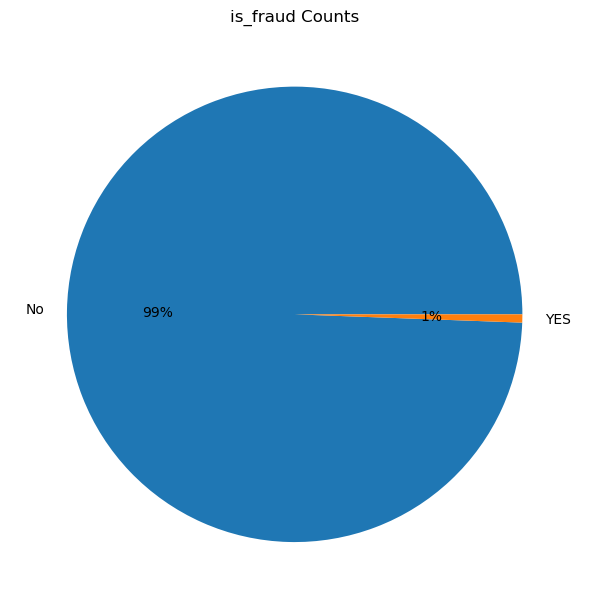

In [14]:
# Affichage de la distribution des fraudes (is_fraud)
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot pour le graphique circulaire
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Ajuster la disposition pour éviter les chevauchements
plt.show()

In [15]:
# Sélection des caractéristiques (features) et de la cible (target)
X = train_data.drop(columns=["is_fraud"])  # Caractéristiques sans la colonne cible
y = train_data["is_fraud"]  # Variable cible (fraude ou non)

In [16]:
# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Normalisation des données pour KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajuste le scaler sur X_train et le transforme
X_test_scaled = scaler.transform(X_test)  # Applique la transformation sur X_test

In [18]:
# Liste des valeurs de k à tester
k_values = range(1, 21)  # Tester les valeurs de k de 1 à 20
accuracies = []  # Liste pour stocker les précisions

In [19]:
# Tester les différentes valeurs de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialisation du modèle KNN avec k voisins
    knn.fit(X_train_scaled, y_train)  # Entraînement du modèle
    y_pred = knn.predict(X_test_scaled)  # Prédiction sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de l'exactitude du modèle
    accuracies.append(accuracy)  # Ajouter la précision à la liste

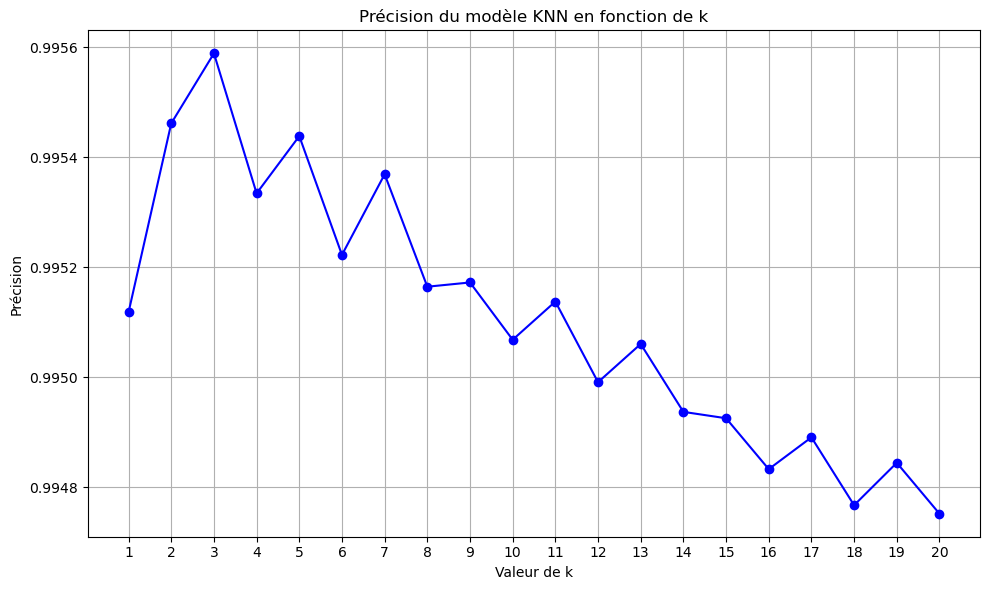

In [20]:
# Affichage des résultats dans un diagramme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')  # Tracer la précision en fonction de k
plt.title("Précision du modèle KNN en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("Précision")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

In [21]:
# Trouver la meilleure valeur de k
best_k = k_values[np.argmax(accuracies)]
print(f"La meilleure valeur de k est : {best_k}")
print(f"Précision avec la meilleure valeur de k : {max(accuracies) * 100:.2f}%")

La meilleure valeur de k est : 3
Précision avec la meilleure valeur de k : 99.56%


In [22]:
# Évaluation du modèle avec le meilleur k
accuracy = accuracy_score(y_test, y_pred)  # Calcul de l'exactitude du modèle
print(f"Accuracy of the KNN model with best k ({best_k}): {accuracy * 100:.2f}%")

Accuracy of the KNN model with best k (3): 99.48%


In [66]:
# Analyser les caractéristiques des transactions frauduleuses dans les données d'entraînement
print("Analyse des transactions frauduleuses dans les données d'entraînement:")
fraudulent_cases = train_data[train_data['is_fraud'] == 1]
print("\nMontant moyen des fraudes:", fraudulent_cases['amt'].mean())
print("Montant maximum des fraudes:", fraudulent_cases['amt'].max())
print("Merchant les plus fréquents dans les fraudes:", 
      fraudulent_cases['merchant'].value_counts().head())
print("Categories les plus fréquentes dans les fraudes:", 
      fraudulent_cases['category'].value_counts().head())

# Créer un cas extrême basé sur l'analyse
transaction_extreme = {
    'merchant': fraudulent_cases['merchant'].value_counts().index[0],  # Merchant le plus fréquent dans les fraudes
    'category': fraudulent_cases['category'].value_counts().index[0],  # Catégorie la plus fréquente dans les fraudes
    'amt': float(fraudulent_cases['amt'].quantile(0.95)),  # Montant dans le 95e percentile des fraudes
    'gender': 1,
    'job': fraudulent_cases['job'].value_counts().index[0],  # Profession la plus fréquente dans les fraudes
    'unix_time': int(datetime.datetime.now().timestamp()),
    'lat': 40.7128,      # New York
    'long': -74.0060,
    'city_pop': 100000,  # Petite ville (contraste avec la taille de la transaction)
    'merch_lat': -33.8688,  # Sydney, Australie (très grande distance)
    'merch_long': 151.2093
}

# Faire la prédiction(KNN
prediction, probability = predict_fraud(transaction_extreme)

# Afficher le résultat détaillé
print("\nRésultat de la prédiction pour le cas extrême:")
print(f"Prédiction: {'Frauduleuse' if prediction == 1 else 'Non frauduleuse'}")
print(f"Probabilité: {probability:.2f}")

# Calculer la distance entre le client et le marchand
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en kilomètres
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

distance = calculate_distance(
    transaction_extreme['lat'], 
    transaction_extreme['long'],
    transaction_extreme['merch_lat'], 
    transaction_extreme['merch_long']
)

print(f"\nDistance entre acheteur et vendeur: {distance:.0f} km")

Analyse des transactions frauduleuses dans les données d'entraînement:

Montant moyen des fraudes: 531.3200919264589
Montant maximum des fraudes: 1376.04
Merchant les plus fréquents dans les fraudes: merchant
494    49
105    48
337    48
146    47
645    47
Name: count, dtype: int64
Categories les plus fréquentes dans les fraudes: category
4     1743
11    1713
8      915
12     843
2      618
Name: count, dtype: int64

Résultat de la prédiction pour le cas extrême:
Prédiction: Frauduleuse
Probabilité: 0.67

Distance entre acheteur et vendeur: 15989 km


In [ ]:
#Cas Fraudeuse

#'merchant': fraudulent_cases['merchant'].value_counts().index[0],  # Merchant le plus fréquent dans les fraudes
#    'category': fraudulent_cases['category'].value_counts().index[0],  # Catégorie la plus fréquente dans les fraudes
#    'amt': float(fraudulent_cases['amt'].quantile(0.95)),  # Montant dans le 95e percentile des fraudes
#    'gender': 1,
#    'job': fraudulent_cases['job'].value_counts().index[0],  # Profession la plus fréquente dans les fraudes
#    'unix_time': int(datetime.datetime.now().timestamp()),
#    'lat': 40.7128,      # New York
#    'long': -74.0060,
#    'city_pop': 100000,  # Petite ville (contraste avec la taille de la transaction)
#    'merch_lat': -33.8688,  # Sydney, Australie (très grande distance)
#    'merch_long': 151.2093